In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

In [2]:
data = pd.read_csv("data_poly.csv")

In [3]:
data

,x,y
0,0,3
1,1,4
2,2,5
3,3,7
4,4,10
5,5,8
6,6,9
7,7,10
8,8,10
9,9,23


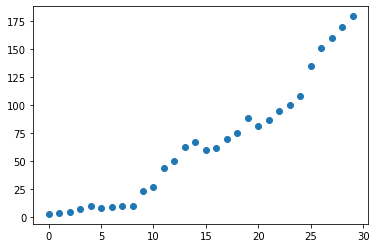

In [4]:
plt.scatter(data['x'], data['y'])

In [6]:
X = data[['x']]
y = data['y']

In [10]:
X

,x
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [60]:
poly= PolynomialFeatures(degree=2, include_bias=False)
poly_1= PolynomialFeatures(degree=15, include_bias=False)


In [61]:
poly_x = poly.fit_transform(X)
poly_x1 = poly_1.fit_transform(X)

In [62]:
poly_model = LinearRegression()
linear_model = LinearRegression()
poly_model_1 = LinearRegression()

In [63]:
poly_model.fit(poly_x, y)
linear_model.fit(X,y)
poly_model_1.fit(poly_x1, y)


LinearRegression()

In [64]:
poly_predict = poly_model.predict(poly_x)
linear_predict = linear_model.predict(X)
poly_predict_1 = poly_model_1.predict(poly_x1)


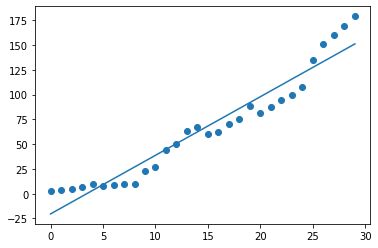

In [67]:
plt.scatter(data['x'], data['y'])
plt.plot(linear_predict)


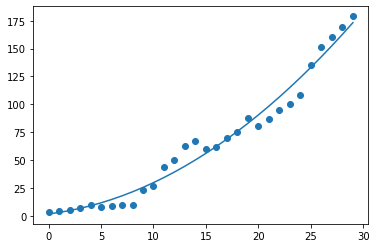

In [68]:
plt.scatter(data['x'], data['y'])
plt.plot(poly_predict)


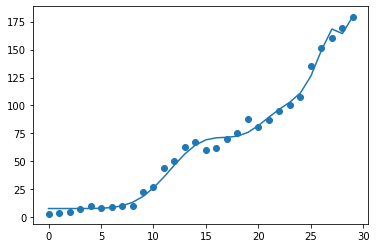

In [69]:
plt.scatter(data['x'], data['y'])
plt.plot(poly_predict_1)

In [126]:
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.4, random_state=2)

In [127]:
def model_run(model, train_x, train_y, test_x, test_y):
    model.fit(train_x, train_y)
    train_pred = model.predict(train_x)
    test_pred = model.predict(test_x)
    train_rmse = (r2_score(train_y, train_pred))
    test_rmse = (r2_score(test_y, test_pred))
    return train_rmse, test_rmse
    

In [130]:
train_res = []
test_res = []


for i in range(0,10):
    if i==0:
        model = LinearRegression()
        train_rmse, test_rmse = model_run(model, train_x, train_y, test_x, test_y)
        train_res.append(1-train_rmse)
        test_res.append(1-test_rmse)
        
    else:
        poly= PolynomialFeatures(degree=i, include_bias=False)
        poly_train_x = poly.fit_transform(train_x)
        poly_test_x = poly.fit_transform(test_x)
        poly_model = LinearRegression()
        train_rmse, test_rmse = model_run(poly_model, poly_train_x, train_y, poly_test_x, test_y)
        train_res.append(1-train_rmse)
        test_res.append(1-test_rmse)



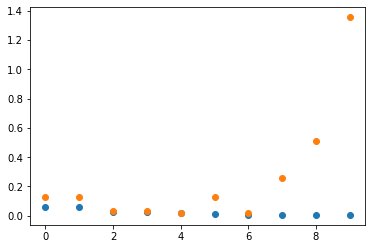

In [132]:
plt.scatter(range(0,10),train_res)
plt.scatter(range(0,10),test_res)
